In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

%matplotlib inline

In [2]:
ls

gen.csv  gender_submission.csv  test.csv  titanic.ipynb  train.csv


In [60]:
train = pd.read_csv("train.csv")
gen =  pd.read_csv("gender_submission.csv")
test = pd.read_csv("test.csv")

In [4]:
print(train.head())
print('-'*30)
print(test.head())
print('-'*30)
print(gen.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
--

In [5]:
train.shape, test.shape, gen.shape

((891, 12), (418, 11), (418, 2))

In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

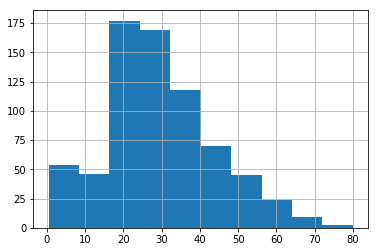

In [63]:
train.Age.hist()

In [64]:
train["Age"].fillna(train["Age"].mean(), inplace=True)
train["Embarked"].fillna('S', inplace=True)

In [65]:
test["Age"].fillna(test["Age"].mean(), inplace=True)
test["Embarked"].fillna('S', inplace=True)

In [12]:
train.isnull().any()
#test["Embarked"].isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

In [13]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [14]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [15]:
train['Title'] = train['Title'].replace('Mme', 'Mrs')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

test['Title'] = test['Title'].replace('Mme', 'Mrs')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [16]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train['Title'] = train['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping)

In [17]:
train.loc[ train['Age'] <= 14, 'Age'] = 0
train.loc[(train['Age'] > 14) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[ train['Age'] > 64, 'Age'] = 4

test.loc[ train['Age'] <= 14, 'Age'] = 0
test.loc[(train['Age'] > 14) & (test['Age'] <= 32), 'Age'] = 1
test.loc[(train['Age'] > 32) & (test['Age'] <= 48), 'Age'] = 2
test.loc[(train['Age'] > 48) & (test['Age'] <= 64), 'Age'] = 3
test.loc[ train['Age'] > 64, 'Age'] = 4

In [66]:
train["Cabin"].fillna('0', inplace=True)
test["Cabin"].fillna('0', inplace=True)

train.loc[train.Cabin.str[0] == 'A', 'Cabin'] = 1
train.loc[train.Cabin.str[0] == 'B', 'Cabin'] = 2
train.loc[train.Cabin.str[0] == 'C', 'Cabin'] = 3
train.loc[train.Cabin.str[0] == 'D', 'Cabin'] = 4
train.loc[train.Cabin.str[0] == 'E', 'Cabin'] = 5
train.loc[train.Cabin.str[0] == 'F', 'Cabin'] = 6
train.loc[train.Cabin.str[0] == 'G', 'Cabin'] = 7
train.loc[train.Cabin.str[0] == 'T', 'Cabin'] = 8

test.loc[train.Cabin.str[0] == 'A', 'Cabin'] = 1
test.loc[train.Cabin.str[0] == 'B', 'Cabin'] = 2
test.loc[train.Cabin.str[0] == 'C', 'Cabin'] = 3
test.loc[train.Cabin.str[0] == 'D', 'Cabin'] = 4
test.loc[train.Cabin.str[0] == 'E', 'Cabin'] = 5
test.loc[train.Cabin.str[0] == 'F', 'Cabin'] = 6
test.loc[train.Cabin.str[0] == 'G', 'Cabin'] = 7
test.loc[train.Cabin.str[0] == 'T', 'Cabin'] = 8

In [68]:
#train.Cabin

In [19]:
train.loc[train.Embarked == 'C', 'Embarked'] = 1
train.loc[train.Embarked == 'Q', 'Embarked'] = 2
train.loc[train.Embarked == 'S', 'Embarked'] = 3
#train.Embarked.fillna(0, inplace=True)

test.loc[test.Embarked == 'C', 'Embarked'] = 1
test.loc[test.Embarked == 'Q', 'Embarked'] = 2
test.loc[test.Embarked == 'S', 'Embarked'] = 3
#test.Embarked.fillna(0, inplace=True)

In [20]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [21]:
train.FamilySize.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [22]:
train['FamilySizeGroup'] = '0'    #small
test['FamilySizeGroup'] = '0'     #small

train.loc[train['FamilySize'] == 1, 'FamilySizeGroup'] = 1    #alone
train.loc[train['FamilySize'] >= 4, 'FamilySizeGroup'] = 2    #big

test.loc[test['FamilySize'] == 1, 'FamilySizeGroup'] = 1    #alone
test.loc[test['FamilySize'] >= 4, 'FamilySizeGroup'] = 2    #big

In [23]:
train['Sex'] = train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test['Sex'] = test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [24]:
# Class vs Survived
print(train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [25]:
# sex vs Survived
print(train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Sex  Survived
1    1  0.742038
0    0  0.188908


In [26]:
#print(train[['FamilySizeGroup', 'Survived']].groupby(['FamilySizeGroup'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print(train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000


In [27]:
del train['SibSp']
del test['SibSp']

del train['Parch']
del test['Parch']

del train['FamilySize']
del test['FamilySize']

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySizeGroup
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,A/5 21171,7.2500,0,3,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,PC 17599,71.2833,3,1,3,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,STON/O2. 3101282,7.9250,0,3,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,113803,53.1000,3,3,3,0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,373450,8.0500,0,3,1,1


In [29]:
not_num = ['Name','Ticket']

In [30]:
num = [x for x in train.columns if x not in not_num]

In [31]:
num

['PassengerId',
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'Fare',
 'Cabin',
 'Embarked',
 'Title',
 'FamilySizeGroup']

In [32]:
train_num = train[num]

In [33]:
train_num.isnull().any()

PassengerId        False
Survived           False
Pclass             False
Sex                False
Age                False
Fare               False
Cabin              False
Embarked           False
Title              False
FamilySizeGroup    False
dtype: bool

In [34]:
train_num

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySizeGroup
0,1,0,3,0,1.0,7.2500,0,3,1,0
1,2,1,1,1,2.0,71.2833,3,1,3,0
2,3,1,3,1,1.0,7.9250,0,3,2,1
3,4,1,1,1,2.0,53.1000,3,3,3,0
4,5,0,3,0,2.0,8.0500,0,3,1,1
5,6,0,3,0,1.0,8.4583,0,2,1,1
6,7,0,1,0,3.0,51.8625,5,3,1,1
7,8,0,3,0,0.0,21.0750,0,3,4,2
8,9,1,3,1,1.0,11.1333,0,3,3,0
9,10,1,2,1,0.0,30.0708,0,1,3,0


In [35]:
label = train_num.Survived

In [36]:
train_df = train_num.drop(['Survived','PassengerId'], axis =1)

In [37]:
num.remove('PassengerId')
num.remove('Survived')

In [38]:
train_df

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySizeGroup
0,3,0,1.0,7.2500,0,3,1,0
1,1,1,2.0,71.2833,3,1,3,0
2,3,1,1.0,7.9250,0,3,2,1
3,1,1,2.0,53.1000,3,3,3,0
4,3,0,2.0,8.0500,0,3,1,1
5,3,0,1.0,8.4583,0,2,1,1
6,1,0,3.0,51.8625,5,3,1,1
7,3,0,0.0,21.0750,0,3,4,2
8,3,1,1.0,11.1333,0,3,3,0
9,2,1,0.0,30.0708,0,1,3,0


In [39]:
model = RandomForestClassifier(n_estimators=800)

In [40]:
X_train, X_test,y_train, y_test = train_test_split(train_df,label,test_size =.25 )

In [41]:
train_df.shape, label.shape

((891, 8), (891,))

In [42]:
X_train.shape, X_test.shape

((668, 8), (223, 8))

In [43]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
pred = model.predict(X_test)

In [45]:
accuracy_score(pred,y_test)

0.81165919282511212

In [46]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySizeGroup
0,892,3,"Kelly, Mr. James",0,0.0,330911,7.8292,0,2,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,0.0,363272,7.0000,0,3,3,0
2,894,2,"Myles, Mr. Thomas Francis",0,0.0,240276,9.6875,0,2,1,1
3,895,3,"Wirz, Mr. Albert",0,0.0,315154,8.6625,0,3,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,0.0,3101298,12.2875,0,3,3,0


In [47]:
num

['Pclass',
 'Sex',
 'Age',
 'Fare',
 'Cabin',
 'Embarked',
 'Title',
 'FamilySizeGroup']

In [48]:
test_num = test[num]
test_num.head()


,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySizeGroup
0,3,0,0.0,7.8292,0,2,1,1
1,3,1,0.0,7.0000,0,3,3,0
2,2,0,0.0,9.6875,0,2,1,1
3,3,0,0.0,8.6625,0,3,1,1
4,3,1,0.0,12.2875,0,3,3,0


In [49]:
test_num.isnull().any()

Pclass             False
Sex                False
Age                False
Fare               False
Cabin              False
Embarked           False
Title              False
FamilySizeGroup    False
dtype: bool

In [69]:
test_num

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySizeGroup
0,3,0,0.0,7.8292,0,2,1,1
1,3,1,0.0,7.0000,0,3,3,0
2,2,0,0.0,9.6875,0,2,1,1
3,3,0,0.0,8.6625,0,3,1,1
4,3,1,0.0,12.2875,0,3,3,0
5,3,0,0.0,9.2250,0,3,1,1
6,3,1,0.0,7.6292,0,2,2,1
7,2,0,0.0,29.0000,0,3,1,0
8,3,1,0.0,7.2292,0,1,3,1
9,3,0,0.0,24.1500,0,3,1,0


In [51]:
pred2 = model.predict(test_num)

ValueError: could not convert string to float: C105

In [ ]:
gen['Survived'] = pred2

In [ ]:
gen.to_csv('gen.csv', index= None)

In [ ]:
a = 0.86547085201793716
b = 0.84753363228699552